## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')
   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploring your data

### Read cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
cleaned_df = pd.read_csv("../data/processed/processed_data.csv")

In [3]:
cleaned_df.head()

,datetime,temp (K),feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_all,id_weather,main_weather,description_weather,icon_weather
0,2022-12-14 17:00:00,298.16,298.62,1011,73,298.16,298.16,3.09,60,20,801,Clouds,few clouds,02n
1,2022-12-14 18:00:00,298.16,298.62,1010,73,298.16,298.16,2.06,30,40,802,Clouds,scattered clouds,03n
2,2022-12-14 19:00:00,297.16,297.78,1010,83,297.16,297.16,1.54,20,40,802,Clouds,scattered clouds,03n
3,2022-12-14 20:00:00,296.16,296.81,1009,88,296.16,296.16,1.54,320,40,802,Clouds,scattered clouds,03n
4,2022-12-14 21:00:00,296.16,296.81,1009,88,296.16,296.16,1.03,320,40,802,Clouds,scattered clouds,03n


In [4]:
# Number of Rows and Cols
rows, cols = cleaned_df.shape
rows, cols

(8712, 14)

### Attribute's imformation & description


In [5]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             8712 non-null   object 
 1   temp (K)             8712 non-null   float64
 2   feels_like           8712 non-null   float64
 3   pressure             8712 non-null   int64  
 4   humidity             8712 non-null   int64  
 5   temp_min             8712 non-null   float64
 6   temp_max             8712 non-null   float64
 7   wind_speed           8712 non-null   float64
 8   wind_deg             8712 non-null   int64  
 9   clouds_all           8712 non-null   int64  
 10  id_weather           8712 non-null   int64  
 11  main_weather         8712 non-null   object 
 12  description_weather  8712 non-null   object 
 13  icon_weather         8712 non-null   object 
dtypes: float64(5), int64(5), object(4)
memory usage: 953.0+ KB


As you can see here, all the datatype are suitable for all of the atributes

Description:

 0. datetime: The date that data is colected         
 1. temp (K): Temperature in K absolute         
 2. feels_like: Temperature that we feel in K absolute           
 3. pressure: just pressure             
 4. humidity: just humidity             
 5. temp_min: Lowest temperature of the day             
 6. temp_max: Highest temperature of the day             
 7. wind_speed: Speed of wind           
 8. wind_deg: Degree of wind           
 9. clouds_all: Cloudiness, %           
 10. id_weather: Weather condition id           
 11. main_weather: Main weather of the day         
 12. description_weather: More explicitly expalain for main weather :>  
 13. icon_weather: an icon for visualize the weather (but in this project's scope, we don't use)         

### Numerical analysis

In [6]:
cleaned_df.head()

,datetime,temp (K),feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_all,id_weather,main_weather,description_weather,icon_weather
0,2022-12-14 17:00:00,298.16,298.62,1011,73,298.16,298.16,3.09,60,20,801,Clouds,few clouds,02n
1,2022-12-14 18:00:00,298.16,298.62,1010,73,298.16,298.16,2.06,30,40,802,Clouds,scattered clouds,03n
2,2022-12-14 19:00:00,297.16,297.78,1010,83,297.16,297.16,1.54,20,40,802,Clouds,scattered clouds,03n
3,2022-12-14 20:00:00,296.16,296.81,1009,88,296.16,296.16,1.54,320,40,802,Clouds,scattered clouds,03n
4,2022-12-14 21:00:00,296.16,296.81,1009,88,296.16,296.16,1.03,320,40,802,Clouds,scattered clouds,03n


In [7]:
df_copy = cleaned_df.drop(['datetime', 'id_weather', 'main_weather', 'description_weather', 'icon_weather'], axis='columns')

df_copy.describe().round(1)
df_copy.head()

,temp (K),feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_all
0,298.16,298.62,1011,73,298.16,298.16,3.09,60,20
1,298.16,298.62,1010,73,298.16,298.16,2.06,30,40
2,297.16,297.78,1010,83,297.16,297.16,1.54,20,40
3,296.16,296.81,1009,88,296.16,296.16,1.54,320,40
4,296.16,296.81,1009,88,296.16,296.16,1.03,320,40


### Describe the correlation between features in the dataset

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

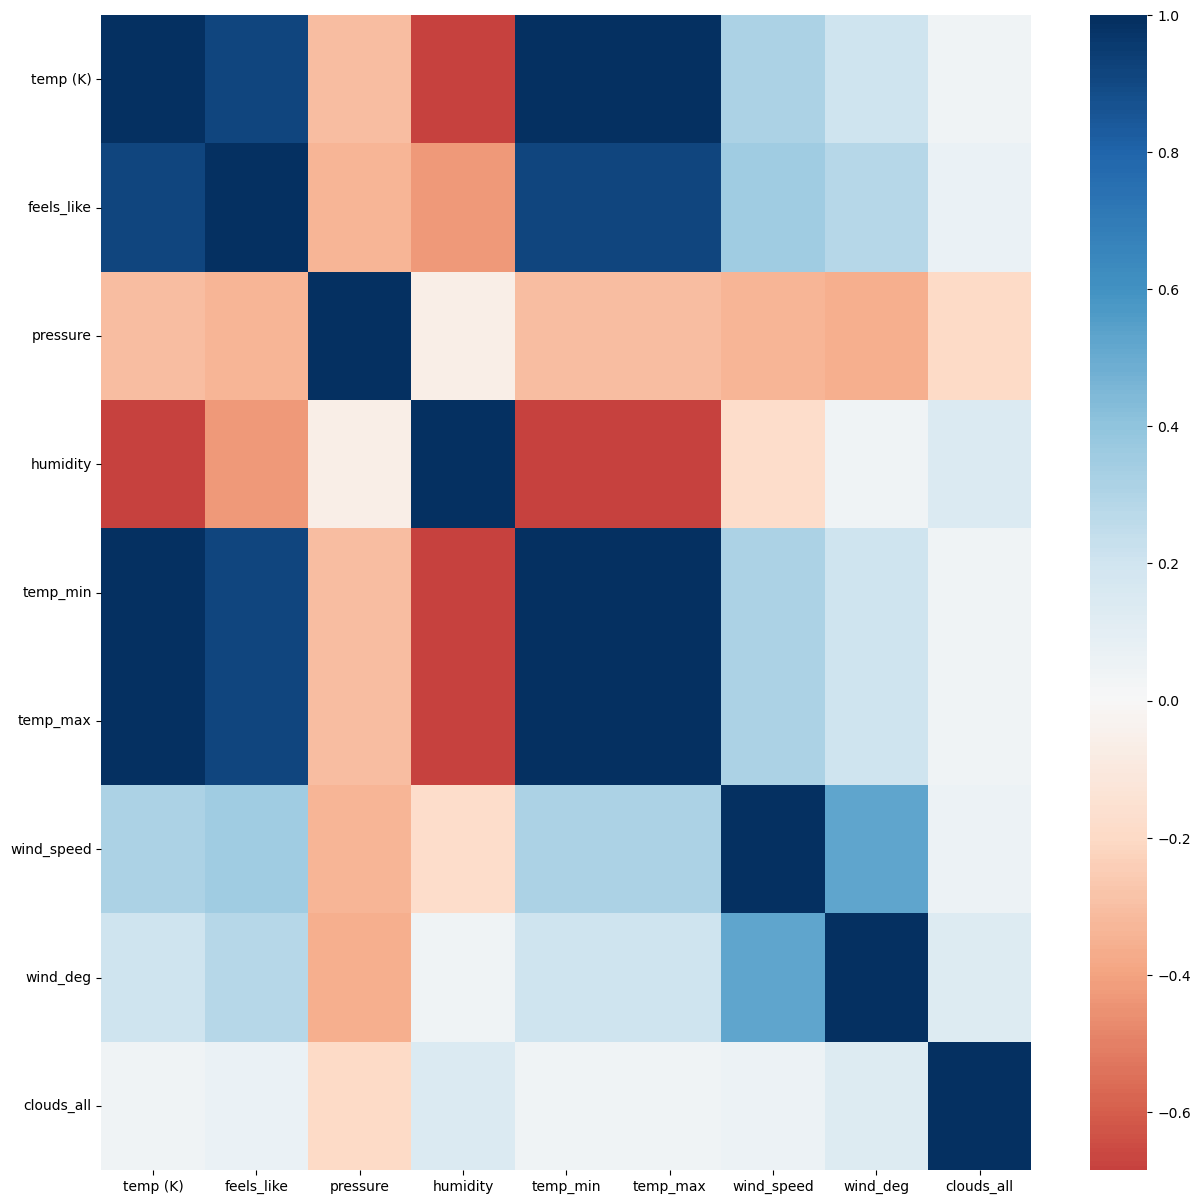

In [8]:
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
df_copy = cleaned_df.drop(['datetime', 'id_weather', 'main_weather', 'description_weather', 'icon_weather'], axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

## Making questions 01?

**Question:** How are wind speed and wind direction related, and what can be drawn from it??

**Answering this question will:** Shows us the relationship between wind speed and wind direction, thereby extracting useful information in choosing direction (literally direction) for certain tasks, such as setting up tarpaulins, hang wind chimes, ..etc

**How we answer this question:** Calculate the correlation between wind speed and wind direction and visualize this relationship with a heatmap by using seaborn.

**ANSWER**

As we can see on the heatmap, these two attributes have positive linear coefficients, meaning they co-vary. We can conclude that for jobs that require wind speed, we should choose a suitable wind direction.

Note:

    if (degree>337.5) return 'Northerly';

    if (degree>292.5) return 'North Westerly';

    if(degree>247.5) return 'Westerly';

    if(degree>202.5) return 'South Westerly';
    
    if(degree>157.5) return 'Southerly';

    if(degree>122.5) return 'South Easterly';

    if(degree>67.5) return 'Easterly';

    if(degree>22.5){return 'North Easterly';}

### Analyzing to get the answer

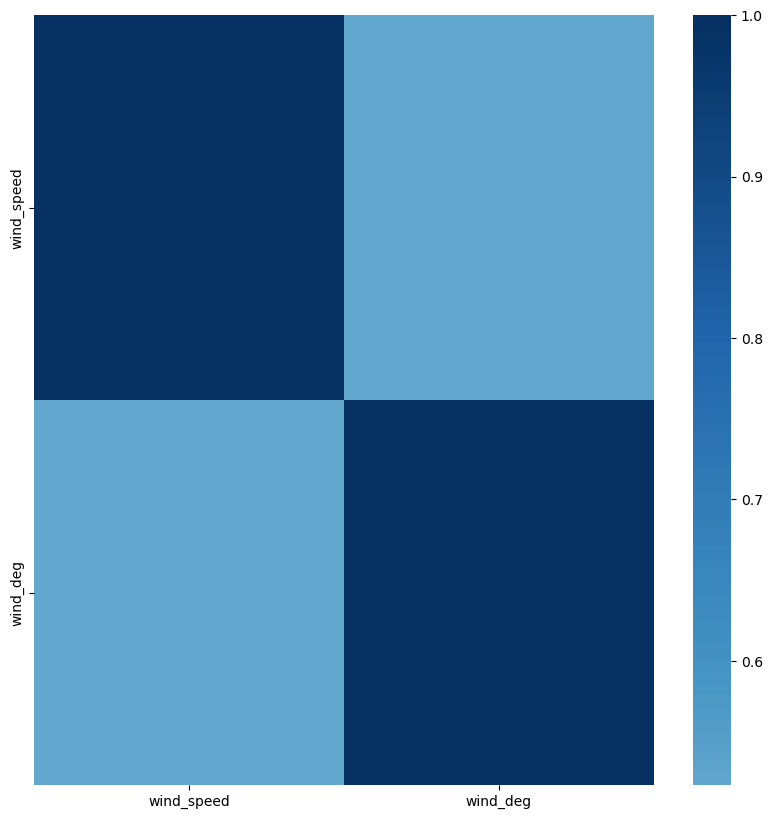

In [9]:
df_copy = cleaned_df.copy()

selected_columns = df_copy[['wind_speed', 'wind_deg']]

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(selected_columns.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

## Making question 02?

**Question:** Compare the temperature of the 5 days with the highest temperature and the 5 days with the lowest temperature ?

**Answering this question will:**  Determine the relative average temperature of the hottest and coolest days in Ho Chi Minh City, serving for future weather forecasting.

**How we answer this question:** Determine the relative average temperature of the hottest and coolest days in Ho Chi Minh City, serving for future weather forecasting.


### Analyzing to get the answer

Find country that have least renewable energy usage

In [10]:
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
top_5_days = df_copy.nlargest(5, 'temp (K)')
bottom_5_days = df_copy.nsmallest(5, 'temp (K)')

avg_top_5 = top_5_days['temp (K)'].mean()
avg_bot_5 = bottom_5_days['temp (K)'].mean()

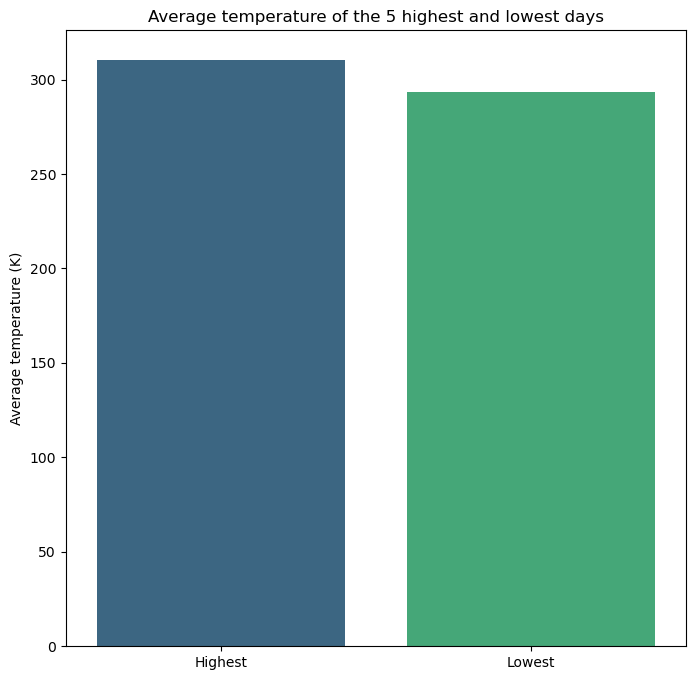

In [11]:
avg_temperatures = [avg_top_5, avg_bot_5]
labels = ['Highest', 'Lowest']

plt.figure(figsize=(8, 8))
sns.barplot(x=labels, y=avg_temperatures, palette='viridis')
plt.title('Average temperature of the 5 highest and lowest days')
plt.ylabel('Average temperature (K)')
plt.show()

## Making question 03? 

**Question:** Provides information about the distribution of humidity ?

**Answering this question will:**  The frequency of humidity in weather data can provide important information about the climate environment and can influence many other health-related activities and decisions based on humidity levels. And also partly represents the typical climate of the area.

**How we answer this question:** Draw a histogram using seaborn

**ANSWER**

As we can see in the histogram, the humidity is in the very high range of 80 - 100, this partly helps us be proactive in protecting our health, and at the same time shows us the typical climate in Ho Chi Minh City.

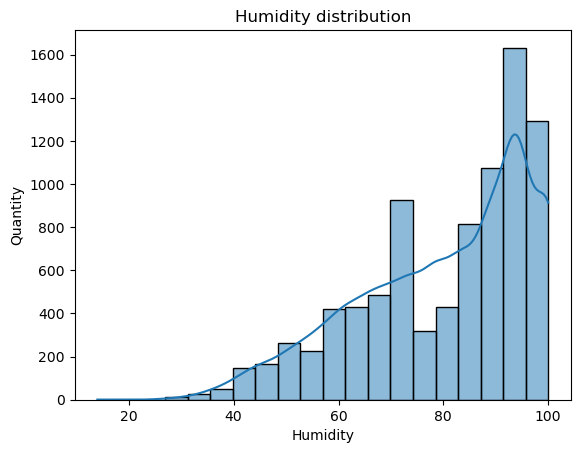

In [12]:
df_copy = cleaned_df.copy()

sns.histplot(df_copy['humidity'], bins=20, kde=True)

plt.xlabel('Humidity')
plt.ylabel('Quantity')

plt.title('Humidity distribution')

plt.show()

## Making question 04? 

**Question:** Is there a relationship between humidity and air pressure?

**Answering this question will:**  Understanding the relationship between humidity and air pressure can provide important information for weather forecasting, the relationship between humidity and air pressure can affect the health of humans and organisms, in industries such as agriculture, food manufacturing, and others, this relationship can affect the production process and the final product.

**How we answer this question:** Visualize this relationship using a heatmap.

**ANSWER:**  As we can see in the heatmap, these two attributes have approximately zero correlation, so we cannot use these two attributes as a measure or a tool for research.

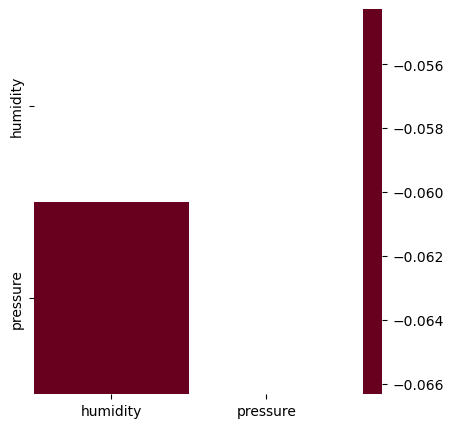

In [13]:
df_copy = cleaned_df.copy()

selected_columns = df_copy[['humidity', 'pressure']]
mask = np.triu(np.ones_like(selected_columns.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(selected_columns.corr(), cmap='RdBu', center=0,ax=ax, mask=mask)
plt.show()

## Making question 05? 

**Question:** Is there a difference between the actual temperature and the feeling?

**Answering this question will:**  Feel temperature is calculated based on actual temperature along with other factors such as humidity, wind, sunlight. This is the temperature that humans perceive, which may differ from the actual temperature due to this factor, felt temperature can affect people's health and perception of temperature. It can decide whether the environment is comfortable and safe for daily activities, understanding the difference between actual and felt temperatures can provide important information for weather forecasting and how people react to different weather conditions.

**How we answer this question:** Calculate the average of 2 attribute columns, save in 2 variables then visualize on bar chart using seaborn.

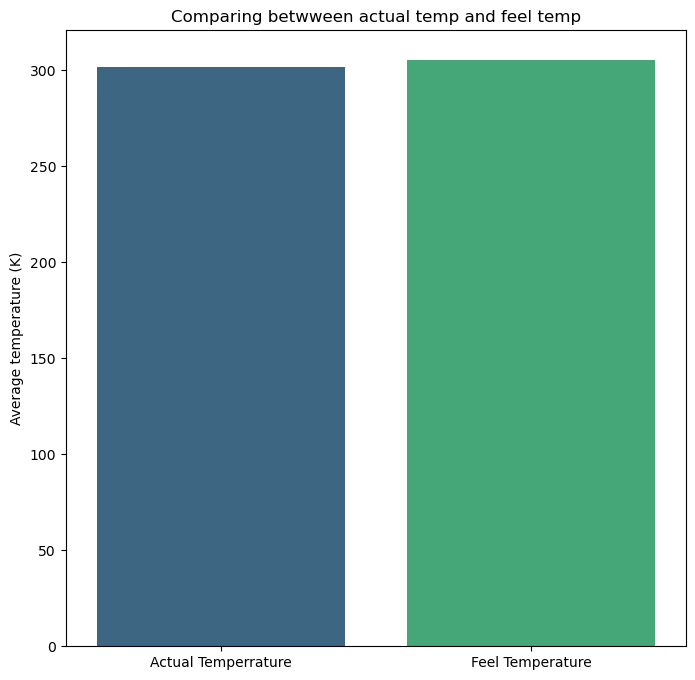

In [14]:
df_copy = cleaned_df.copy()

avg_real_temp = df_copy['temp (K)'].mean()
avg_feel_like = df_copy['feels_like'].mean()

avg_temperatures = [avg_real_temp, avg_feel_like]
labels = ['Actual Temperrature', 'Feel Temperature']

plt.figure(figsize=(8, 8))
sns.barplot(x=labels, y=avg_temperatures, palette='viridis')
plt.title('Comparing betwween actual temp and feel temp')
plt.ylabel('Average temperature (K)')
plt.show()